In [1]:
import json, glob, pycm, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, HTML, Markdown

In [2]:
def display_experiment(experiment):
    display(Markdown(f'## {experiment["concept"]["label"]} ({experiment["concept"]["id"]})'))
    display(Markdown(experiment["concept"]["definition"]))
    display(Markdown("### Confusion matrix"))
    cm = pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])
    df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_title(experiment["concept"]["label"])
    ax.set(xlabel='Predict', ylabel='Actual')
    plt.show()
    df = pd.DataFrame.from_records(experiment["data"])
    df_fp = df[((df["actual"] == 'negative') & (df["predicted"] == 'positive'))][["label", "description", "rationale"]]
    if len(df_fp) > 0:
        df_fp_styler = df_fp.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### False positives"))
        display(df_fp_styler)
    df_fn = df[((df["actual"] == 'positive') & (df["predicted"] == 'negative'))][["label", "description", "rationale"]]
    if len(df_fn) > 0:
        df_fn_styler = df_fn.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### False negatives"))
        display(df_fn_styler)

In [3]:
experiments = [ json.load(open(file, 'r')) for file in glob.glob('caligraph_experiments/*/gpt-4*') ]

In [4]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": f'{pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC:.1%}',
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    } 
    for experiment in experiments ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,FP,FN,POP
10,Player of American football from Alabama,1.000000,High,100.0%,0,0,40
16,Member of the House of Representatives of Japa...,1.000000,High,100.0%,0,0,40
14,1748 birth,1.000000,High,100.0%,0,0,40
1,Populated place in Luxembourg,1.000000,High,100.0%,0,0,40
6,FK Sarajevo player,1.000000,High,100.0%,0,0,40
9,1921 film,0.950000,High,97.5%,0,1,40
13,2017 video game,0.950000,High,97.5%,0,1,40
0,Argentine football manager,0.950000,High,97.5%,1,0,40
7,Medalist at the 2019 Summer Universiade,0.950000,High,97.5%,0,1,40
4,Hill station in India,0.950000,High,97.5%,0,1,40


## Player of American football from Alabama (http://caligraph.org/ontology/Player_of_American_football_from_Alabama)

Player of American Football from Alabama:

(noun) An individual who actively participates in the sport of American football and is either a resident of the U.S. state of Alabama, was born in Alabama, or is affiliated with Alabama through education or professional sports. This can include high school, college (such as University of Alabama or Auburn University), or professional players (in the National Football League) who have a significant connection to Alabama. These players have knowledge of and engage in the rules and regulations of American football and have developed skills necessary for the sport such as passing, catching, tackling, and strategic playmaking.

### Confusion matrix

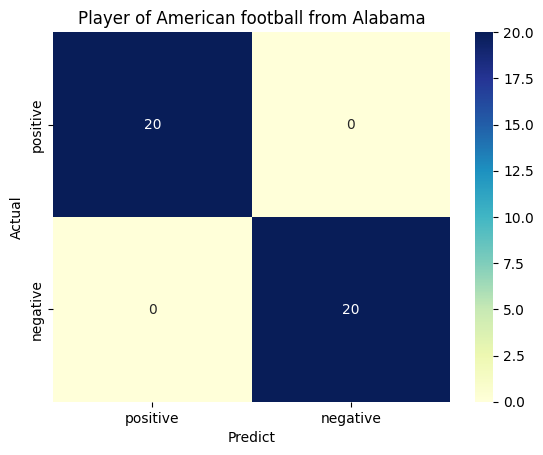

## Member of the House of Representatives of Japan, 2003–2005 (http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005)

"Member of the House of Representatives of Japan, 2003–2005"

Noun

Definition: An individual who was elected and served as a representative in the lower house of the National Diet, which is Japan's bicameral legislature, during the period from 2003 to 2005. These members were responsible for representing the interests of citizens, proposing and voting on legislation, and contributing to governmental processes in accordance with Japanese law and constitutional provisions.

### Confusion matrix

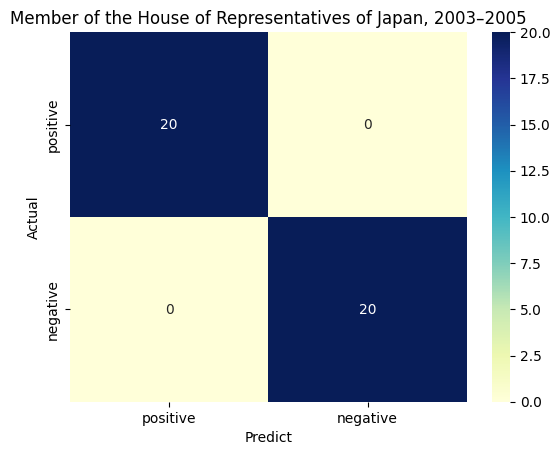

## 1748 birth (http://caligraph.org/ontology/1748_birth)

"1748 birth" refers to the event or instance of an individual being born in the year 1748. This was during the 18th century, in the period of Enlightenment in Europe. This concept is typically used in historical or genealogical contexts, when discussing people or events from that specific time period.

### Confusion matrix

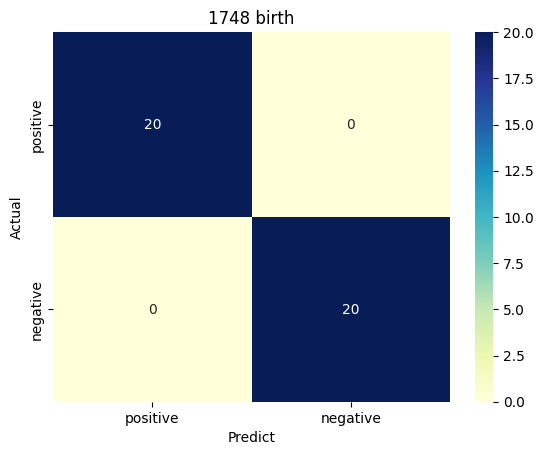

## Populated place in Luxembourg (http://caligraph.org/ontology/Populated_place_in_Luxembourg)

"Populated Place in Luxembourg" refers to a geographical area within the Grand Duchy of Luxembourg that is inhabited by people. This could be an urban area such as a city or town, or a rural area like a village or hamlet. The area is characterized by human activity, housing, and infrastructure, and is recognized by the government for administrative and statistical purposes.

### Confusion matrix

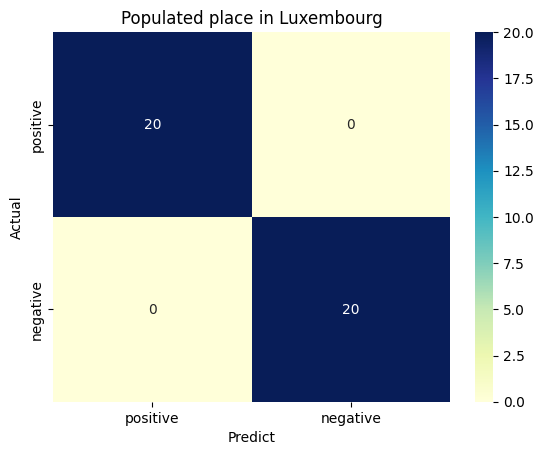

## FK Sarajevo player (http://caligraph.org/ontology/FK_Sarajevo_player)

"FK Sarajevo player" (noun):

1. An individual who is officially part of the Fudbalski klub Sarajevo, a professional football club based in Sarajevo, Bosnia and Herzegovina. 
2. This person participates in games and tournaments as a representative of FK Sarajevo, either as a player on the field or as part of the reserve team.
3. The player may occupy a specific position such as forward, midfielder, defender, or goalkeeper and has to adhere to the rules and regulations of the game and the club.
4. This individual is typically contracted by FK Sarajevo and is compensated for their participation and performance in the sport.

### Confusion matrix

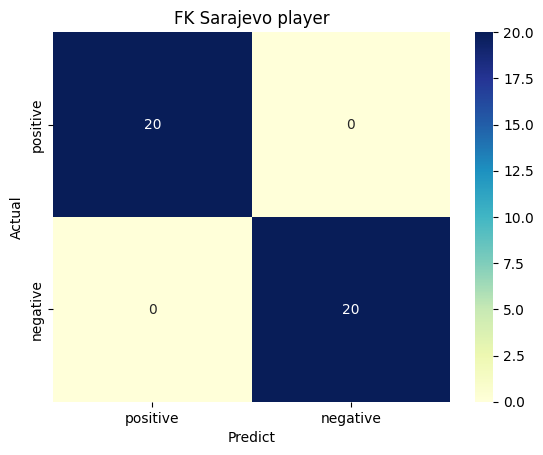

## 1921 film (http://caligraph.org/ontology/1921_film)

"1921 film" (noun):

A motion picture or movie that was produced or released in the year 1921. This era in film history was characterized by the silent film period, prior to the widespread use of sound in films. The subject matter, themes, visual effects, and filming techniques are reflective of the societal and technological conditions of the early 20th century.

### Confusion matrix

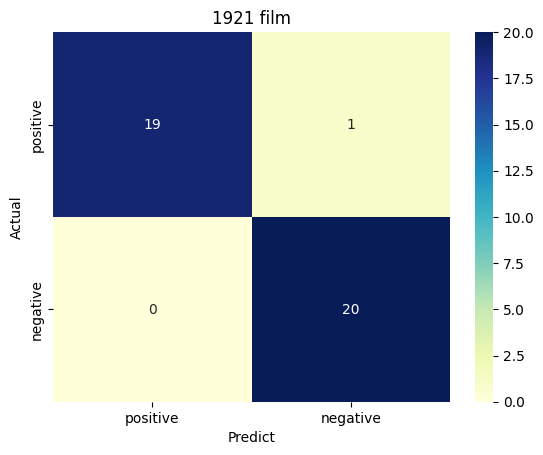

### False negatives

label,description,rationale
A Lowland Cinderella,"""A Lowland Cinderella"" is a British silent feature film released in 1922. It is a black-and-white romance film based on British novels and set in Scotland. The film was directed by Sidney Morgan and was distributed by Butcher's Film Service. It stars Ralph Forbes, Joan Morgan, and George Foley. The film was written by S. R. Crockett and runs for about 58 minutes. The information about ""A Lowland Cinderella"" was derived from various sources, including the Wikipedia pages for ""List of Butcher's Film Service films"", ""List of British films of 1922"", and ""Sidney Morgan"", among others.","Based on the provided information, it is not possible to argue that ""A Lowland Cinderella"" is a 1921 film. The description clearly states that the film was released in 1922, not 1921. Therefore, it does not meet the criteria of being produced or released in the year 1921 as defined in the concept of a ""1921 film""."


## 2017 video game (http://caligraph.org/ontology/2017_video_game)

"2017 video game" (noun):

1. A digital or electronic game that was first released or made available to the public in the calendar year 2017. This could encompass multiple platforms such as consoles, personal computers, or mobile devices.

2. These games often involve interaction with a user interface to generate visual feedback on two- or three-dimensional video display devices. They can belong to a wide range of genres, including but not limited to action, adventure, strategy, puzzle, role-playing, sports, and simulation.

3. The term "2017 video game" specifically relates to the year of release and does not necessarily denote any particular style, quality, or technological advancement in the field of video gaming. 

Note: This term is often used in the context of discussing developments and trends in the video game industry, or when comparing games from different time periods.

### Confusion matrix

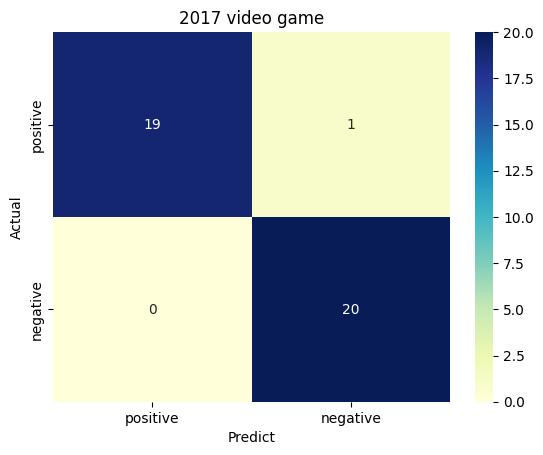

### False negatives

label,description,rationale
Final Fantasy XV,"Final Fantasy XV is an action role-playing video game that is part of the Final Fantasy video game series. Released in 2016 for platforms such as PlayStation 4, PlayStation 3, Xbox One, Microsoft Windows, and Google Stadia, the game was developed and published by Square Enix. The game is set on fictional planets and is noted for being in development hell. The game's score was composed by Yoko Shimomura and supports cross-platform play. It is known for being a best-selling PlayStation 4 video game that also supports Steam Workshop. The game was directed by Hajime Tabata, produced by Shinji Hashimoto, and features artwork by Yusuke Naora, Tetsuya Nomura, and Isamu Kamikokuryo. It is powered by the Luminous Engine. The game also has various alternate titles, including ""Final Fantasy XV: Episode Ardyn,"" ""Final Fantasy XV: Episode Ignis,"" ""Final Fantasy XV Royal Edition,"" and ""Final Fantasy XV: Windows Edition,"" among others.","Based on the provided definition and information, there is no valid argument to assert that Final Fantasy XV is a 2017 video game. The entity description clearly states that Final Fantasy XV was released in 2016, not 2017. Therefore, it does not meet the criteria of a ""2017 video game"" as defined above."


## Argentine football manager (http://caligraph.org/ontology/Argentine_football_manager)

"Argentine Football Manager" (noun) 

A professional individual from Argentina who oversees and directs the operational and strategic aspects of a football team. This includes managing players and team staff, planning and conducting training sessions, devising match strategies, and making decisions on team selection. They may work at various levels of football, from local clubs to national teams. Their role is critical in the development of the team and the achievement of its sporting objectives.

### Confusion matrix

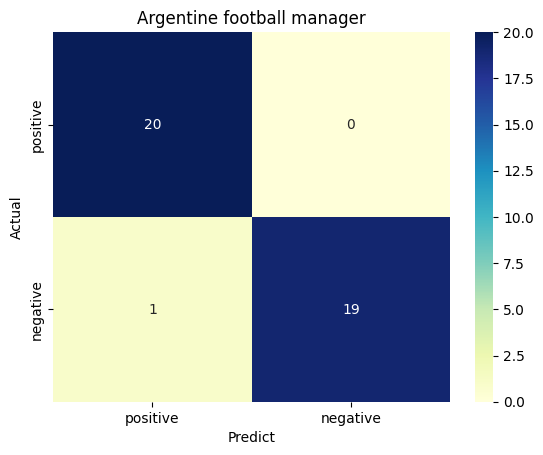

### False positives

label,description,rationale
Héctor Gabriel Morales,"Héctor Gabriel Morales (born November 30, 1989) is an Argentine professional footballer and manager. He was born in Corrientes, Argentina, and is notable for his career as a player in several football clubs, both local and international. He has played as a forward and midfielder for teams such as Ferencvárosi TC, Boca Unidos, Club Atlético Villa San Carlos, Estudiantes de La Plata, and C.D. Victoria. Aside from his playing career, Morales also made his mark as a manager, particularly for the club Barcelona S.C. He has spent some of his professional career in Honduras, making him a recognized foreign player in the Honduran Liga Nacional. Morales also played in Hungary, both for Ferencvárosi TC and as an expatriate. Standing at 1.76 meters tall, Morales has also made significant contributions to the 2010-2011 season of Ferencvárosi TC as a manager.","Héctor Gabriel Morales fits the definition of an Argentine football manager as he is a professional individual from Argentina who has overseen and directed the operational and strategic aspects of a football team. This is evident from his role as a manager for the club Barcelona S.C. His responsibilities likely included managing players and team staff, planning and conducting training sessions, devising match strategies, and making decisions on team selection. His role as a manager was critical in the development of the team and the achievement of its sporting objectives. Therefore, based on the provided definition and information, Héctor Gabriel Morales can be classified as an Argentine football manager."


## Medalist at the 2019 Summer Universiade (http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade)

"Medalist at the 2019 Summer Universiade" refers to an individual athlete or team who, during the 2019 Summer Universiade sports event, achieved a top-three finish in their respective competition to earn a gold, silver, or bronze medal. The Universiade is an international multi-sport event, organized for university athletes by the International University Sports Federation (FISU). The Summer Universiade includes numerous sports, such as athletics, gymnastics, swimming, and various team sports. For the 2019 edition, the event was held in Naples, Italy.

### Confusion matrix

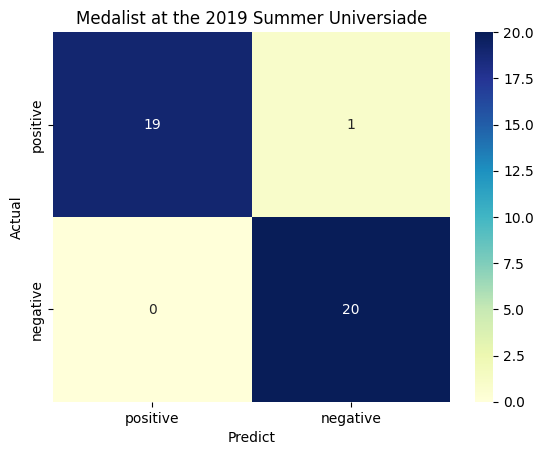

### False negatives

label,description,rationale
Dean Farris,"Dean Farris is an American male swimmer, born on November 14, 1997, in Atlanta, Georgia, United States. He is known for his backstroke and freestyle swimming techniques. Farris has represented the United States at the Universiade, a worldwide university sports competition, where he won a gold medal and set a national record for the United States. He has been recognized as a 20th-century and 21st-century American person, indicating his significant contributions in the field of swimming. Farris has swum for the Harvard Crimson men's swimming team. His achievements and information have been cataloged on various lists and categories on Wikipedia, including ""United States records in swimming"" and ""Universiade gold medalists for the United States"".","The definition of a ""Medalist at the 2019 Summer Universiade"" is an individual athlete or team who achieved a top-three finish in their respective competition during the 2019 Summer Universiade sports event, earning a gold, silver, or bronze medal. The description of Dean Farris states that he represented the United States at the Universiade, where he won a gold medal. Although the specific year of the Universiade is not mentioned in the description, it can be inferred from the context that it refers to the 2019 Summer Universiade. Therefore, based on the provided definition and the information about Dean Farris, it can be argued that Dean Farris is a ""Medalist at the 2019 Summer Universiade""."


## Hill station in India (http://caligraph.org/ontology/Hill_station_in_India)

Hill Station in India (noun):

1. A town or city located at a higher elevation than the nearby plain or valley, especially in India. 
2. Known for their cooler climates, these places are often used as retreats from the heat during the summer months, and as a result, they have become popular tourist destinations. 
3. They were established by the British during their rule in India primarily for their own use during the summer, as a place of refuge from the heat of the plains. 
4. Hill stations in India are typically characterized by their lush greenery, tea and spice plantations, colonial architecture, and breathtaking mountain views. 
5. Examples of famous hill stations in India include Shimla, Darjeeling, Ooty, and Manali.

### Confusion matrix

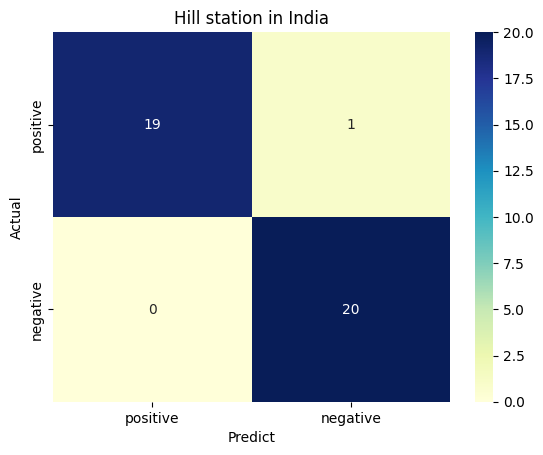

### False negatives

label,description,rationale
Ganjam district,"Ganjam district is a named individual and a hill station in India, specifically, a district of Odisha. It is also known by various other names including ""Ganjam dist"", ""Aska"", ""Ganjam"", and ""District of Ganjam"". The district has a total area of 8.0706E9 and is part of the country India. The residents of Ganjam district are referred to as ""Ganjami"". The district has a population density of 429.0 and a total population of 3529031, which ranks first in comparison to other districts. The postal code of the district is either 761 xxx or 760 xxx and it falls under the Indian Standard Time zone with a UTC offset of +5:30. Ganjam district is a subdivision of Odisha, and it includes several other subdivisions such as Bishwanath Das, Ranjhalli, Bandhaguda, Khallikote, and Digapahandi, among others. Many notable people, including Upendra Bhanja, Puroshottam Choudhary, Sisir Mishra, Geoff Pitchford, and Pramila Bisoyi, were born in Ganjam district. The district is also the residence of Madhaba Nanda Behera. The information about Ganjam district is derived from various sources including the list of districts of Odisha, Hinduism in Odisha, and the list of hill stations in India.","The text does not provide sufficient information to argue that Ganjam district is a hill station in India. While it is mentioned that Ganjam district is a district in Odisha, India, there is no information provided about its elevation, climate, or characteristics that would classify it as a hill station according to the provided definition. The definition of a hill station in India includes being located at a higher elevation than the nearby plain or valley, having a cooler climate, being established by the British during their rule in India, and being characterized by lush greenery, tea and spice plantations, colonial architecture, and breathtaking mountain views. None of these characteristics are mentioned in the description of Ganjam district. Therefore, based on the provided information, it cannot be argued that Ganjam district is a hill station in India."


## State leader in 2014 (http://caligraph.org/ontology/State_leader_in_2014)

"State leader in 2014" refers to an individual who held the highest position of power or authority in a sovereign state for some or all of the year 2014. This individual could be a president, prime minister, monarch, or other official depending on the form of government in the particular state. The role of the state leader typically includes making key policy decisions, overseeing the function of the state, and representing the state in national or international affairs. The specific powers and responsibilities of the state leader can vary widely from one country to another, and may be subject to limitations imposed by the country's constitution or other laws.

### Confusion matrix

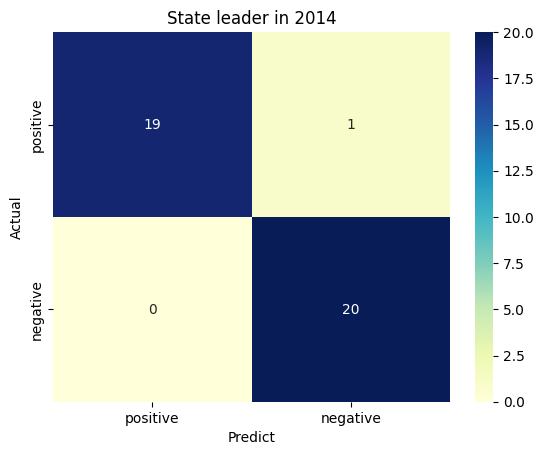

### False negatives

label,description,rationale
Joyce Banda,"Joyce Banda (born Joyce Hilda Ntila on 12 April 1950 in Malemia, Zomba, Nyasaland, now Malawi) is a distinguished Malawian woman in politics and a Malawian feminist. She is a prominent figure in Africa, known as the first woman to hold political office in the continent. She served as the President of Malawi, making her one of the few women presidents in Africa. Banda was also elected as a female head of state, head of government, and deputy head of state. She served as a foreign minister from 2006 to 2009 and was a vice president. Banda was a dignitary at the state funeral and memorial service of Nelson Mandela. She is a Chewa by ethnicity and was named among the BBC 100 Women. She is affiliated with the Democratic Progressive Party, People's Party and United Democratic Front in Malawi. Banda is married to Richard Banda and studied at Columbus University, Louisiana, Atlantic International University, and Royal Roads University.","The definition of a ""State leader in 2014"" refers to an individual who held the highest position of power or authority in a sovereign state for some or all of the year 2014. This individual could be a president, prime minister, monarch, or other official depending on the form of government in the particular state. The description of Joyce Banda indicates that she served as the President of Malawi, which is a sovereign state. Therefore, given that she held the highest position of power in Malawi, she fits the definition of a ""State leader in 2014"". However, the description does not specify the exact years of her presidency, so it is not definitively clear from the provided information alone whether she was a state leader specifically in the year 2014."


## Single-camera television sitcom (http://caligraph.org/ontology/Single-camera_television_sitcom)

"Single-camera television sitcom" is a term referring to a specific production style of television programs, particularly sitcoms, where filming is conducted using a single camera set up. Unlike multi-camera television sitcoms that use multiple cameras filming from different angles simultaneously, a single-camera setup captures one shot at a time from varying angles. This style is often used to create a more cinematic, detailed, and visually appealing look, allowing for greater creative control over the visual elements. It is commonly used in sitcoms that aim for a more realistic, dramatic, and high-quality aesthetic. However, it may require more time and budget for production due to the necessary adjustments for each shot.

### Confusion matrix

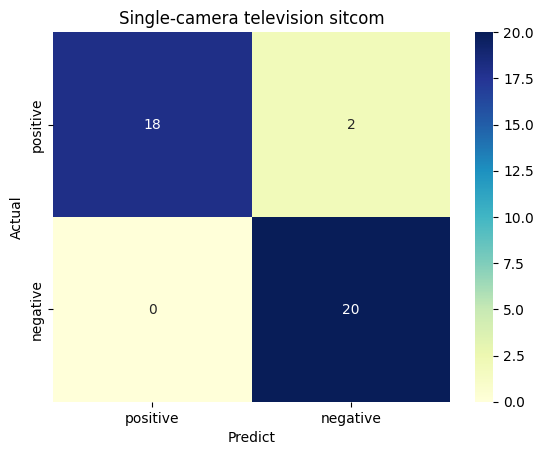

### False negatives

label,description,rationale
Clueless (TV series),"""Clueless (TV series)"" is a live-action television show based on the film of the same name. It is a comedy television series that was originally broadcast by the American Broadcasting Company and later changed networks. The show was created by Amy Heckerling and directed by Neal Israel, Joanna Kerns, and Rusty Cundieff. The series, distributed by Paramount Domestic Television, was also aired by other networks such as MTV (Canada), TeenNick, TVNorge, Comedy Central (British TV channel), Nickelodeon (British and Irish TV channel), MBC 4, RTÉ 2, and TV5 (Philippine TV network). The show, which falls under the genres of sitcom and teen sitcom, had a total of three seasons with 62 episodes. It starred actors such as Twink Caplan, Elisa Donovan, Rachel Blanchard, Donald Faison, Doug Sheehan, Michael Lerner, Stacey Dash, Wallace Shawn, and David Lascher. The series was released on September 20, 1996, and concluded on May 25, 1999. The opening theme of the show was performed by China Forbes and the series was composed by David Kitay.","The provided description of ""Clueless (TV series)"" does not include any specific information about the production style or the number of cameras used during filming. Therefore, based on the information given, it is not possible to assert that ""Clueless (TV series)"" is a single-camera television sitcom."
Community (TV series),"""Community"" is an American comedy television series that aired from September 17, 2009, to June 2, 2015, with a total of six seasons and 110 episodes. The series is known for its unique blend of comedy genres, incorporating elements of situation comedy, mockumentary, and metafiction. It was created by Dan Harmon and featured an ensemble cast including Joel McHale, Gillian Jacobs, Danny Pudi, Yvette Nicole Brown, Alison Brie, Donald Glover, Ken Jeong, Chevy Chase, and Jim Rash. The series was filmed in Los Angeles at the Radford Studio Center and was broadcasted by various networks including NBC, Citytv, MBC 4, and Yahoo! Screen. It also had a significant online presence as a web series. The show's music was composed by Ludwig Göransson, and its opening theme was by The 88. The series was executive produced by a team including Dan Harmon, Neil Goldman and Garrett Donovan, Tristram Shapeero, the Russo brothers, Rob Schrab, and Chris McKenna. It was distributed by Sony Pictures Television and formatted in High-definition television and Dolby Digital. ""Community"" was a critical success and developed a cult following. It was notable for its meta-humor and pop culture references, and for its innovative use of mixed media formats including clay animation. The series was also known for its phrase ""Six seasons and a movie,"" a goal that became a rallying cry for fans during periods of uncertain renewal.","The description of ""Community"" does not provide specific information about the production style used in filming the series. It does not mention whether a single-camera or multi-camera setup was used. Therefore, based on the information provided, it cannot be definitively argued that ""Community"" is a single-camera television sitcom."


## Newspaper in New South Wales (http://caligraph.org/ontology/Newspaper_in_New_South_Wales)

Newspaper in New South Wales

Noun

A printed or digital publication that is periodically released, often daily or weekly, in the state of New South Wales, Australia. This publication contains a variety of content including news, features, opinions, and advertisements, primarily focusing on events and issues within New South Wales, but also covering national and international news. Examples include The Sydney Morning Herald, The Daily Telegraph, and The Australian.

### Confusion matrix

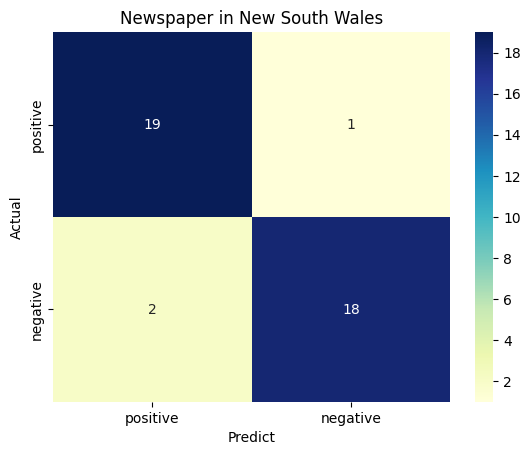

### False positives

label,description,rationale
Parramatta Advertiser,"The Parramatta Advertiser is a named individual and a newspaper published in Sydney, Australia. It is also known as dbr:Parramatta_Advertiser and has a preferred label of ""Parramatta Advertiser"". The format of the newspaper is tabloid and it is available both online and offline. The Parramatta Advertiser was founded on July 15, 1933 and its headquarters are located in Parramatta, Sydney, New South Wales, Australia. The newspaper is owned by NewsLocal and is categorized as a weekly newspaper. The Parramatta Advertiser was derived from the category Newspapers published in Sydney and from NewsLocal.","The Parramatta Advertiser fits the definition of a Newspaper in New South Wales as it is a publication that is periodically released, specifically on a weekly basis. It is published in the state of New South Wales, Australia, specifically in Parramatta, Sydney. The Parramatta Advertiser contains a variety of content, as is typical of newspapers, and is available in both printed and digital formats. Furthermore, it is a part of the category Newspapers published in Sydney, which is within New South Wales. Therefore, based on the provided definition and information, the Parramatta Advertiser can be classified as a Newspaper in New South Wales."
The Free Thought,"""The Free Thought"" is a Ukrainian-language newspaper that was first published in 1949 in Sydney, Australia. It is a non-English language publication established by a Ukrainian publisher and is considered a significant establishment of 1949 in Australia. The newspaper's circulation is reported at 1,500 copies and it follows the ISO 216 format. The newspaper, also known as ""Vil'na dumka"" or ""Vil`na Dumka,"" was founded on July 10, 1949, and its headquarters are located in Lidcombe, New South Wales, Australia. Apart from Ukrainian, the newspaper also features content in English.","""The Free Thought"" fits the definition of a Newspaper in New South Wales as it is a periodically released publication, specifically in a Ukrainian language, that was first published in Sydney, Australia, which is located in New South Wales. The newspaper's headquarters are also located in New South Wales, specifically in Lidcombe. While the content language is primarily Ukrainian, it also features content in English, indicating a variety of content. Although the definition does not specify the language of the newspaper, it does not exclude non-English publications. Therefore, based on the provided definition and information about ""The Free Thought,"" it can be argued that ""The Free Thought"" is a Newspaper in New South Wales."


### False negatives

label,description,rationale
Dubbo,"Dubbo is a city in Australia, specifically in New South Wales. It is characterized as a town or city in Australia, a college town, a town in the Central West of New South Wales, and a country rugby league club in New South Wales. The city has a population of 43,516. Notably, it is also the birthplace of numerous individuals including Tony Lawler, Pat Crawford, David Peachey, Luke Quigley, and many others. It is also the location of numerous entities, such as the Macquarie River railway bridge, the Milestone Hotel, and the Apex Oval. Several organizations, including the Daily Liberal and Air Link, have their headquarters in Dubbo. The city is also known for its Royal Australian Air Force installation and for being a place in New South Wales.","Based on the provided definitions, it is not possible to argue that Dubbo is a Newspaper in New South Wales. Dubbo is described as a city in New South Wales, Australia, not a printed or digital publication that is periodically released. While it is mentioned that the Daily Liberal, a newspaper, has its headquarters in Dubbo, this does not make the city itself a newspaper. Therefore, according to the given definitions, Dubbo cannot be classified as a Newspaper in New South Wales."


## PlayStation VR game (http://caligraph.org/ontology/PlayStation_VR_game)

PlayStation VR game (noun):

A type of interactive digital entertainment or simulation that is specifically designed to be played on the PlayStation VR system, a virtual reality headset produced by Sony Interactive Entertainment. These games utilize VR technology to create immersive, 360-degree experiences, often requiring the player to use motion controls or a standard PlayStation controller to interact with the virtual environment.

### Confusion matrix

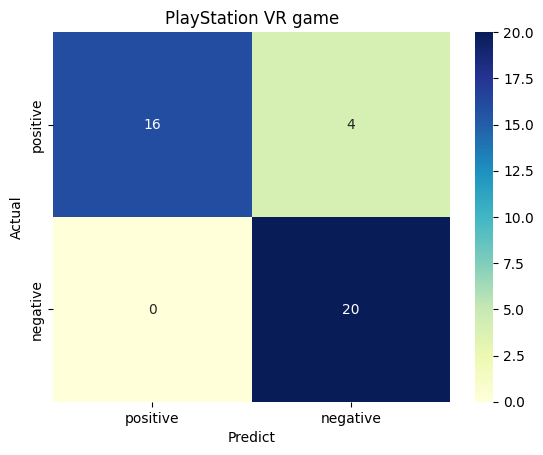

### False negatives

label,description,rationale
The Persistence,"""The Persistence"" is a video game about cloning developed in the United Kingdom. It is a survival horror game set in the 2050s and in outer space. The game falls into the genre of action, roguelike, and survival horror. It uses Unreal Engine and was developed and published by Firesprite. The Persistence is available on multiple platforms including Microsoft Windows, PlayStation 4, PlayStation 5, Xbox Series X and Series S. The game was first released on July 24, 2018, with subsequent releases on May 21, 2020, and June 4, 2021. It is also included in several lists of games on Wikipedia, such as video games developed in the United Kingdom, video games set in the 2050s, and PlayStation 5 games.","The provided description of ""The Persistence"" does not include any information that directly indicates it is a PlayStation VR game. While it is mentioned that the game is available on PlayStation 4 and PlayStation 5, there is no mention of it being designed for or compatible with the PlayStation VR system. Therefore, based on the given definition and the information provided, there is no basis to assert that ""The Persistence"" is a PlayStation VR game."
Doom (1993 video game),"""Doom"" is a 1993 video game developed by id Software. It is a first-person shooter genre video game that has alternative versions and has been commercially released with DOSBox. The game has scored by Bobby Prince and has been published by both Atari, Inc. and id Software. The game was initially released on platforms such as the IOS, PlayStation 3, MS-DOS, Android, Linux, Xbox One, and many others. The game was also part of the Doom franchise series. Doom was not only a popular game but also considered an Internet phenomenon, becoming one of the most-played video games. The game set on Mars and in hell has a science fantasy theme and features demons. Doom also offered a multiplayer online game option and a level editor. The game is notable for its controversies and is known for being a censored video game. Despite this, it is considered artistic. Doom was released on many different dates, with the earliest release date being in 1993.","The provided description of Doom (1993 video game) does not include any information that would suggest it is a PlayStation VR game. The game was released on various platforms, including PlayStation 3, but there is no mention of it being specifically designed for or released on the PlayStation VR system. Therefore, based on the given information, it is not possible to argue that Doom (1993 video game) is a PlayStation VR game."
Eve Online,"Eve Online is a cross-platform video game developed by CCP Games and introduced in 2003. It is a space-based massively multiplayer online role-playing game (MMORPG) that supports cross-platform play and features a virtual economy. The game is also considered a space trading and combat simulator and a space flight simulation game, with elements of vehicular combat. Eve Online has been released on various platforms, including Windows and MacOS, and has been developed using Python software. The game is known for its science fiction universe, dystopian themes, and erotic elements. It has been published by THQ, Atari, and Simon & Schuster and is recognized for its expansion packs and being a business simulation video game. The game is also notable for its inclusion in the Museum of Modern Art's collection.","Based on the provided information, it cannot be argued that Eve Online is a PlayStation VR game. The description of Eve Online does not mention it being designed for or compatible with the PlayStation VR system. It is a cross-platform game that has been released on various platforms, including Windows and MacOS, but there is no mention of PlayStation VR. Therefore, using only the provided information, it cannot be asserted that Eve Online is a PlayStation VR game."
Power Eleven,"Power Eleven is a PlayStation VR game, and a multiplayer and single-pla

## England under-21 international footballer (http://caligraph.org/ontology/England_under-21_international_footballer)

"England Under-21 International Footballer" (noun):

1. A footballer who is officially selected and participates in football matches for England's national under-21 team. The age restriction implies the player is at most 21 years old, although they can still play if they turn 22 during the two-year European Championship campaign.
   
2. Typically, these players are recognized as having significant potential in the sport, and may either be emerging talents in the early stages of their professional careers or established players within the football leagues.

3. The selection of these players is based on their skill, performance, and adherence to the rules and regulations set by the Football Association, the governing body of football in England. 

4. Their primary objective is to represent England in international under-21 football competitions, such as the UEFA European Under-21 Championship. 

5. Being an England under-21 international footballer often serves as a stepping stone to being selected for England's senior national team.

### Confusion matrix

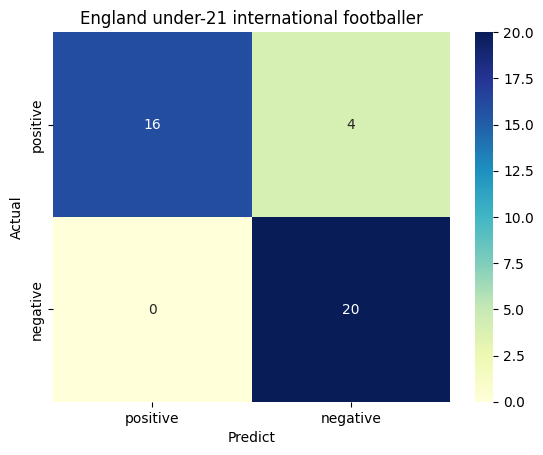

### False negatives

label,description,rationale
Patrick Bamford,"Patrick Bamford is a professional footballer born in September 5, 1993 in Grantham, Lincolnshire, England. He attended Nottingham High School and competes as a forward. Throughout his career, Bamford has played for multiple clubs including Nottingham Forest F.C., Norwich City F.C., Leeds United F.C., Milton Keynes Dons F.C., Derby County F.C., Middlesbrough F.C., Chelsea F.C., Burnley F.C., and Crystal Palace F.C. Notably, he has competed for both England's and Republic of Ireland's national under-19 football teams. Bamford is of Irish descent and has been recognized as a top Premier League goal scorer. He has also been awarded the number 9 jersey in his team lineups. In addition to his athletic achievements, Bamford is a recipient of Nike sponsorship.","The text does not provide sufficient information to assert that Patrick Bamford is an England under-21 international footballer. While it is mentioned that he has competed for England's national under-19 football team, there is no specific mention of him playing for the under-21 team. Therefore, based solely on the provided information, we cannot definitively categorize Patrick Bamford as an England under-21 international footballer."
Paul Gascoigne,"Paul Gascoigne (also known as ""Gazza"") is an English former professional footballer and football manager, born on May 27, 1967, in Gateshead, Tyne and Wear. He is best known for his time with clubs like Tottenham Hotspur F.C., Everton F.C., Newcastle United F.C., S.S. Lazio and Rangers F.C. Internationally, Gascoigne played for the England national football team and was a participant in the 1990 FIFA World Cup. Gascoigne also had a stint as a manager for Kettering Town F.C. and has been involved in various controversies, leading to his conviction for several crimes. He has been diagnosed with bipolar disorder and obsessive-compulsive disorder, and has been a victim of the News International phone-hacking scandal. Gascoigne has also authored autobiographical works, and has been featured in films like ""Bobby Robson: More Than a Manager"", ""Gascoigne"", and ""One Night in Turin"". His spouse is Sheryl Gascoigne and he is related to Regan Gascoigne.","The provided description does not provide sufficient information to argue that Paul Gascoigne is an England under-21 international footballer. While it is stated that Gascoigne played for the England national football team and participated in the 1990 FIFA World Cup, there is no specific mention of him playing for England's under-21 team. Therefore, based solely on the provided information, it cannot be asserted that Paul Gascoigne is an England under-21 international footballer."
"Gary Mills (footballer, born 1961)","Gary Mills (born November 11, 1961 in Northampton) is a former professional English footballer and current football manager. Mills had a versatile playing career, taking on the roles of both a defender and a midfielder. He played for several English teams, including Derby County F.C., Leicester City F.C., Notts County F.C., and Tamworth F.C. Mills also had a stint as an expatriate soccer player in the United States with the Seattle Sounders. His managerial career was equally diverse, with tenures at clubs such as Notts County F.C., Gateshead F.C., and York City F.C. In addition to his football career, Mills is also recognized as an English autobiographer.","The provided description of Gary Mills (footballer, born 1961) does not contain any information that would allow us to assert that he was an England under-21 international footballer. The description mentions that he was a professional English footballer and played for several English teams, but it does not specify whether he was ever selected for and participated in matches for England's national under-21 team. Therefore, based solely on the provided information, we cannot argue that Gary Mills was an England under-21 international footballer."
Ashley Cole,"Ashley Cole is

## 21st-century American drummer (http://caligraph.org/ontology/21st-century_American_drummer)

21st-century American drummer (noun):

1. An individual residing in the United States, who plays the drums, primarily in a period extending from the year 2000 to the present day. The term often refers to both amateur and professional musicians.
2. This drummer may perform in various music genres prevalent in the 21st century, such as rock, pop, hip-hop, jazz, country, electronic music, among others, or could be a member of a band, orchestra, or a solo performer.
3. The drummer might utilize traditional acoustic drum kits or modern electronic drum sets, and could also employ various drumming techniques and styles that have evolved or remained popular during the 21st century.
4. Often, a 21st-century American drummer is influenced by or contributes to the contemporary music scene and may use digital platforms for music production, distribution, and promotion.
5. This individual might also be engaged in creating, recording, and producing music, and could also participate in live performances, tours, and music festivals. 

Note: The specific skills, styles, genres, and level of recognition can vary widely among 21st-century American drummers.

### Confusion matrix

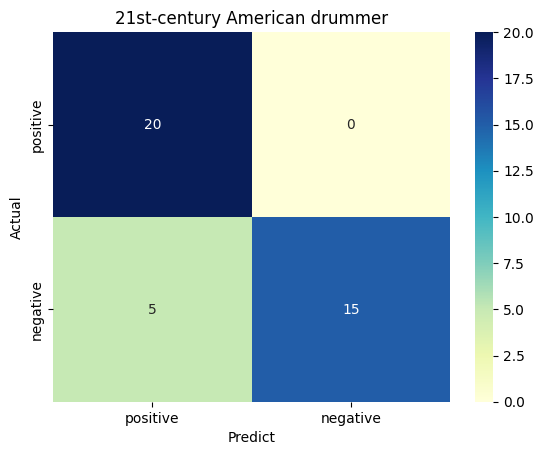

### False positives

label,description,rationale
Taylor Hanson,"Taylor Hanson, born on March 14, 1983, in Tulsa, Oklahoma, is an American musician of Danish descent. He is most renowned as a child rock musician, singer-songwriter, and keyboardist. He began his active years in music in 1992 and is associated with the bands Hanson and Tinted Windows. Hanson has a diverse musical range, having performed and composed in genres such as teen pop, pop rock, rock music, and pop music. He plays a variety of instruments, including the keyboard and tambourine, and is also a singer. He has written and produced numerous songs, including 'MMMBop', 'If Only', and 'Strong Enough to Break'. Hanson has worked with record labels such as Island Records, Mercury Records, 3CG Records, and S-Curve Records. He is also recognized as a drummer, pop and rock pianist, and a tambourine player.","Taylor Hanson fits the definition of a 21st-century American drummer because he is an individual residing in the United States who has been actively involved in music since 1992, which extends into the 21st century. He is associated with the bands Hanson and Tinted Windows, indicating that he performs in a group setting, which aligns with the definition's mention of a drummer being a member of a band. He has performed and composed in various music genres prevalent in the 21st century, such as pop and rock music. He is also recognized as a drummer, indicating that he plays the drums. Furthermore, he has worked with several record labels, suggesting that he may use digital platforms for music production, distribution, and promotion. Therefore, based on the provided definition, Taylor Hanson can be considered a 21st-century American drummer."
Kris Bergstrom,"Kris Bergstrom is a musician from Littleton, Colorado, who was born on July 12, 1976. Known for his skills as a Taiko player and Shamisen player, he is also a notable 21st-century drummer and musical artist. Bergstrom started his active years in the music industry in 2003. He is a Stanford University alumnus and currently resides in Los Angeles, California. His musical repertoire includes instruments such as the Shamisen, Taiko, Phonograph, and Koto. The information about Bergstrom is derived from various categories in Wikipedia, including living people, musicians from Los Angeles, Stanford University alumni, Shamisen players, people from Littleton, Colorado, and Taiko players.","Kris Bergstrom fits the definition of a 21st-century American drummer based on the information provided. Firstly, he resides in the United States, specifically in Los Angeles, California, which satisfies the geographical requirement of the definition. Secondly, he started his active years in the music industry in 2003, which falls within the 21st century, meeting the temporal aspect of the definition. Although the specific instruments he plays are not mentioned as drums, Taiko is a form of drumming, which indicates that he plays the drums. Furthermore, the definition does not limit the term to those who only play traditional drum kits but includes those who utilize various drumming techniques and styles, which would encompass Taiko drumming. Lastly, the definition includes those who are engaged in creating, recording, and producing music, which, as a musician, Bergstrom is likely involved in. Therefore, based on the information provided, Kris Bergstrom can be considered a 21st-century American drummer."
Bruno Agra,"Bruno Agra (born September 1, 1980) is a Brazilian-American drummer, known for his contributions to the rock and heavy metal genres. Born and raised in Rio de Janeiro, Brazil, Agra has been associated with famous bands such as Revolution Renaissance and We Are Harlot. As a 21st-century drummer, he has made a significant impact on the hard rock music scene. Agra's work has been released under the record label Roadrunner Records. He is a notable figure in the music scene of Rio de Janeiro and is recognized as a living person associated with various 

## Autobiography (http://caligraph.org/ontology/Autobiography)

Autobiography (noun):

1. A literary work about the author's own life, written by the author himself or herself. It is a self-narrated account of one's life experiences, achievements, failures, personal insights, and significant events.

2. Unlike a biography, which is a third-person narrative about someone's life, an autobiography is written from a first-person perspective, providing a subjective and intimate depiction of the author's life.

3. Autobiographies typically cover a significant portion of the author's life, although some may focus on specific themes or periods. They often include details about the author's background, personal life, career, relationships, and thoughts.

4. The truthfulness of an autobiography can be subjective, as it relies on the author's memory and personal interpretation of events.

### Confusion matrix

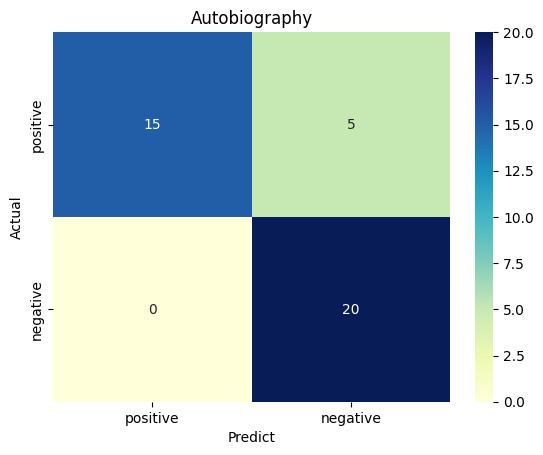

### False negatives

label,description,rationale
"Do You Want to Go With Me?"" (Willst du mit mir gehn","""Do You Want to Go With Me?"" (German: ""Willst du mit mir gehn"") is a named individual, identified within the realm of autobiographies. The title is recognized and preferred as ""Do You Want to Go With Me?\"" (Willst du mit mir gehn"". The piece is derived from a list of autobiographies featured in Wikipedia.","Based on the provided definition of an autobiography, ""Do You Want to Go With Me?"" (Willst du mit mir gehn) can be considered an autobiography if it is a literary work written by the author about their own life. This work would need to be a self-narrated account of the author's life experiences, achievements, failures, personal insights, and significant events. It would be written from a first-person perspective, providing a subjective and intimate depiction of the author's life. The work would typically cover a significant portion of the author's life, although it may focus on specific themes or periods. It would include details about the author's background, personal life, career, relationships, and thoughts. The truthfulness of this work would be subjective, as it relies on the author's memory and personal interpretation of events."
And the Beat Goes On (The Whispers song),"""And the Beat Goes On"" is a song by The Whispers, released as a single in 1979 under the label SOLAR Records. The song is a part of the album 'The Whispers'. It falls under the genres of Dance-pop, Rhythm and blues, Post-disco, and Dance music. The song was written by Leon Sylvers III and produced by Dick Griffey and The Whispers. It has a runtime of 450.0 and 270.0 seconds. The song achieved significant success, becoming a UK top-ten single in 1980. It has alternative labels such as ""And The Beat Goes On"". The song is derived from various sources including 'The Whispers' and 'The Whispers (album)'. The song that preceded ""And the Beat Goes On"" in The Whispers' discography is ""Rock Steady"".","Based on the provided definition and information, there is no evidence to support the assertion that ""And the Beat Goes On"" by The Whispers is an autobiography. The song is a creative work, but it does not fit the definition of an autobiography as it is not a self-narrated account of the author's life experiences, achievements, failures, personal insights, and significant events. It is not written from a first-person perspective about the author's life, nor does it cover a significant portion of the author's life or focus on specific themes or periods in their life. Therefore, ""And the Beat Goes On"" cannot be classified as an autobiography."
Anna Sui (2009 book),"""Anna Sui (2009 book)"" is a non-fiction, autobiographical book authored by Susan Muaddi Darraj. The book, categorized under the genres of Biography and Non-fiction, specifically explores the subject of fashion design. Published by Infobase Publishing, the book has a total of 120 pages and comes in a paperback format. The book carries the ISBN number 9781438128641. The book is derived from various sources, mainly encompassing books by publishing companies from different countries and books by various topics, types, genres, and writers.","Based on the provided definition and information, it is not possible to argue that ""Anna Sui (2009 book)"" is an autobiography. The definition of an autobiography states that it is a literary work about the author's own life, written by the author himself or herself. However, ""Anna Sui (2009 book)"" is authored by Susan Muaddi Darraj, not Anna Sui. Therefore, it does not meet the criteria of an autobiography as defined above."
Nine Lives (2005 film),"""Nine Lives"" is a 2005 English-language film directed by Rodrigo García. This American anthology film is a drama that takes place within a single day and features a large cast, including Ian McShane, Sissy Spacek, K Callan, Mary Kay Place, Elpidia Carrillo, Miguel Sandoval, Glenn Close, Joe Mantegna, Dakota Fanning, 

## Romania international rugby union player (http://caligraph.org/ontology/Romania_international_rugby_union_player)

"Romania international rugby union player" refers to a rugby union athlete who is recognized by the Romanian Rugby Federation as qualified to represent Romania in international rugby union matches and tournaments. This individual typically possesses a high level of skill and expertise in the sport, having met the selection criteria set forth by the governing body. Furthermore, they must either be of Romanian origin or have fulfilled the necessary residency requirements.

### Confusion matrix

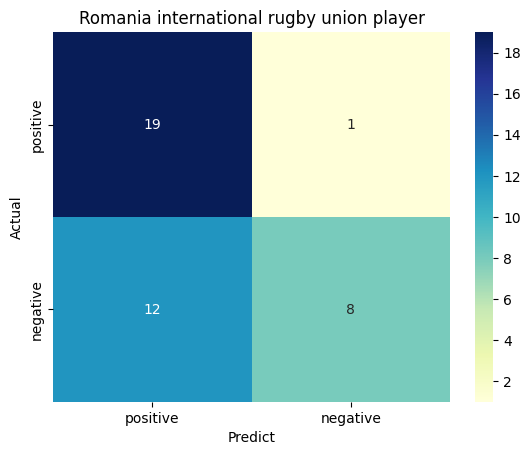

### False positives

label,description,rationale
Iosif Nemes,"Iosif Nemes was a Romanian rugby union player who competed in the 1924 Summer Olympics. He was a part of the Romanian team which won the bronze medal in the rugby union tournament. Born in 1903, Nemes's achievements are recognized in various categories including being an Olympic bronze medalist for Romania, a medalist at the 1924 Summer Olympics, and an Olympic rugby union player of Romania.","Iosif Nemes fits the definition of a ""Romania international rugby union player"" as he was a rugby union athlete who represented Romania in international rugby union matches and tournaments, specifically the 1924 Summer Olympics. His participation in this international event and his achievement of winning a bronze medal demonstrate a high level of skill and expertise in the sport, which aligns with the selection criteria set forth by the Romanian Rugby Federation. Furthermore, his recognition as an Olympic rugby union player for Romania indicates that he was officially recognized by the governing body. Therefore, based on the provided definition, Iosif Nemes can be classified as a Romania international rugby union player."
Gheorghe Gajion,"Gheorghe Gajion is a Moldovan and Romanian international rugby union player born in 1992. He primarily plays as a rugby union prop. Gajion has played for several teams throughout his career, including the Ospreys in the Pro14 league, Rugby Rovigo Delta, and Stade Aurillacois Cantal Auvergne. He has also been part of multiple Pro14 transfers in the 2018-2019, 2020-2021, and 2022-2023 seasons. Standing at 1.9 meters tall and weighing 133 kilograms, Gajion is a notable figure in the rugby world.","Gheorghe Gajion fits the definition of a Romania international rugby union player as he is a recognized rugby union athlete who has represented Romania in international matches. This is evident from the description stating that he is a ""Romanian international rugby union player"". His high level of skill and expertise in the sport is demonstrated by his participation in several teams such as the Ospreys in the Pro14 league, Rugby Rovigo Delta, and Stade Aurillacois Cantal Auvergne. Furthermore, he has been involved in multiple Pro14 transfers, indicating that he meets the selection criteria set by the governing body. Although his nationality is also Moldovan, the description does not negate his Romanian origin or fulfillment of residency requirements, thus he qualifies as a Romania international rugby union player."
Teodor Marian,"Teodor Marian is a named individual and a notable figure in the history of rugby union. He was born in 1904 and is recognized for his achievements in the 1924 Summer Olympics. As a Romanian rugby union player, he represented Romania in the Olympic games, where he notably won a bronze medal. His career and contributions have placed him in several categories, including being an Olympic rugby union player of Romania, a medalist at the 1924 Summer Olympics, and a rugby union player at the 1924 Summer Olympics. He is also acknowledged as an Olympic bronze medalist for Romania. His life and career are derived from historical records such as those detailing rugby union players at the 1924 Summer Olympics, 1904 births, Olympic rugby union players of Romania, medalists at the 1924 Summer Olympics, Romanian rugby union players, and Olympic bronze medalists for Romania.","Teodor Marian is a Romania international rugby union player based on the provided definition and information about him. The definition states that a Romania international rugby union player is an athlete who is recognized by the Romanian Rugby Federation as qualified to represent Romania in international rugby union matches and tournaments. Teodor Marian is noted to have represented Romania in the 1924 Summer Olympics, an international tournament, as a rugby union player. This implies that he was recognized by the Romanian Rugby Federation as qualified to do so. Furthermore, he is of Ro

### False negatives

label,description,rationale
Piti (footballer),"Piti (born 26 May 1981) is a Spanish footballer from Reus, Catalonia, who has played as a midfielder and forward for a number of teams including Real Zaragoza, Hércules CF, PAS Lamia 1964, Jamshedpur FC, CF Reus Deportiu, Ciudad de Murcia, AEL Limassol, Granada CF, Rayo Vallecano and Novelda CF. His career has seen him participate in both the Segunda División and La Liga in Spain, as well as the Super League Greece and the Cypriot First Division. Piti has also been a part of the Catalonia national football team. Throughout his career, Piti has been involved in several transfer seasons, including in the summer of 2013 and winter of 2016-17. He has lived and played football in various countries, including India, Greece, and Cyprus, making him a notable Spanish expatriate sportsperson. His height is 1.74 meters.","There is no information provided in the description of Piti (footballer) that would suggest he is a Romania international rugby union player. The description does not mention any involvement in rugby, let alone at an international level for Romania. Instead, it details his career as a professional footballer in various countries. Therefore, based on the provided information, it is not possible to argue that Piti (footballer) is a Romania international rugby union player."


## Clube Náutico Capibaribe player (http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player)

"Clube Náutico Capibaribe player" refers to any professional football player who is currently a member of the Clube Náutico Capibaribe, a Brazilian football team based in Recife, Pernambuco. This player can be in any position on the team, from goalkeeping to attacking, and is bound by contract to play and represent the club in various domestic and international matches and tournaments.

### Confusion matrix

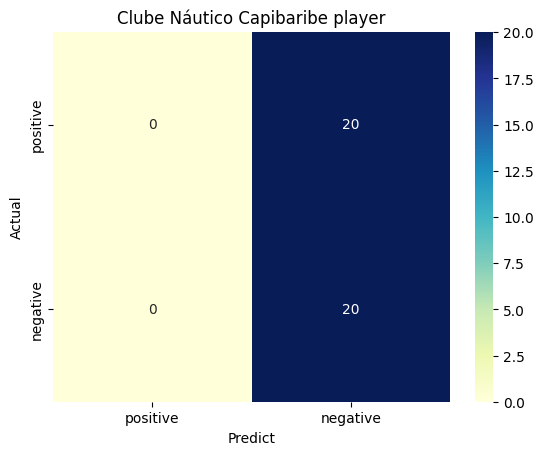

### False negatives

label,description,rationale
Ives (footballer),"Ives (born June 11, 1985 in Rio de Janeiro, Brazil) is a Brazilian footballer who plays as a midfielder. Standing at 1.73 meters tall, Ives has played for multiple teams across his career, notably Paraná Clube, Bangu Atlético Clube, Clube de Regatas do Flamengo, Duque de Caxias Futebol Clube, Mesquita Futebol Clube, Rio Branco Sport Club, America Football Club (Rio de Janeiro), Clube Náutico Capibaribe, Clube Sociedade Esportiva, Audax Rio de Janeiro Esporte Clube, Atlético Rio Negro Clube, Volta Redonda FC, Madureira Esporte Clube, FC Progresul București, and CR Vasco da Gama. He has also played in the Campeonato Brasileiro Série B and C, and has had experience playing football abroad in Romania.","The definition of a Clube Náutico Capibaribe player is a professional football player who is currently a member of the Clube Náutico Capibaribe. The entity description for Ives (footballer) states that he has played for Clube Náutico Capibaribe among other teams. However, it does not specify that he is currently a member of the Clube Náutico Capibaribe. Therefore, based on the provided information, we cannot definitively assert that Ives (footballer) is a Clube Náutico Capibaribe player."
"Marcel (footballer, born August 1981)","Marcel (born August 10, 1981) is a professional footballer from São Paulo, Brazil, specifically São Vicente. He is a midfielder and has played for multiple Brazilian football clubs, including Paulista Futebol Clube, Ituano FC, Vila Nova Futebol Clube, Sport Club Corinthians Paulista, Sociedade Esportiva Palmeiras, Paraná Clube, Grêmio Foot-Ball Porto Alegrense, Esporte Clube Juventude, Resende Futebol Clube, and Clube Náutico Capibaribe. Standing at a height of 1.82 meters, he continues to be an active player in the football world.","The definition of a Clube Náutico Capibaribe player is a professional football player who is currently a member of the Clube Náutico Capibaribe. The entity description for Marcel (footballer, born August 1981) states that he has played for Clube Náutico Capibaribe among other clubs. However, it does not specify whether he is currently a member of the Clube Náutico Capibaribe. Therefore, based on the given information, it cannot be definitively asserted that Marcel (footballer, born August 1981) is a Clube Náutico Capibaribe player."
Vinícius Eutrópio,"Vinícius Eutrópio is a Brazilian footballer and manager, born on June 27, 1966 in Minas Gerais. He was a midfielder and played for teams such as Grêmio Catanduvense de Futebol, Associação Atlética Internacional (Limeira), Grêmio Esportivo Novorizontino, Associação Desportiva Confiança, Figueirense FC, União São João Esporte Clube, Sociedade Esportiva e Recreativa Caxias do Sul, Clube Náutico Capibaribe, Criciúma Esporte Clube, América Futebol Clube (MG), and Tubarão Futebol Clube. As a manager, Eutrópio has led several clubs including Associação Chapecoense de Futebol, Duque de Caxias Futebol Clube, Figueirense FC, G.D. Estoril Praia, Santa Cruz Futebol Clube, Associação Desportiva Confiança, Fluminense FC, Ituano FC, Londrina Esporte Clube, Al-Ittihad Kalba SC, Guarani FC, Club Athletico Paranaense, Agremiação Sportiva Arapiraquense, Club Bolívar, Grêmio Barueri Futebol, and Associação Atlética Ponte Preta. Throughout his career, he has worked in several countries including Portugal, Bolivia, and the United Arab Emirates.","The definition of a Clube Náutico Capibaribe player is any professional football player who is currently a member of the Clube Náutico Capibaribe. The entity description for Vinícius Eutrópio states that he played for Clube Náutico Capibaribe among other teams. However, it does not specify if he is currently a member of the team. Therefore, based on the provided information, we cannot definitively assert that Vinícius Eutrópio is a Clube Náutico Capibaribe player."
"David (footballer, born 1982)","David (born 1982) is a Brazilian professional footballer who has pl

## Member of the European Parliament, 1989–1994 (http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994)

"Member of the European Parliament, 1989–1994" refers to an individual who served as an elected representative in the European Parliament, the legislative body of the European Union, during the term that ran from 1989 to 1994. This representative would have been responsible for making decisions on EU-wide legislation, budget and treaties during this five-year term. Their membership would have required winning an election in one of the member countries of the European Union.

### Confusion matrix

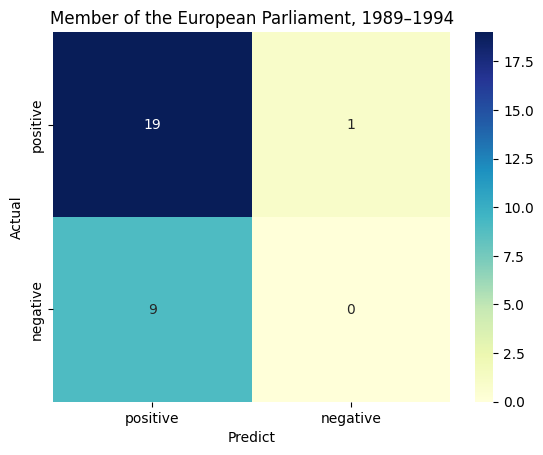

### False positives

label,description,rationale
Dick Ukeiwé,"Dick Ukeiwé was a Black French politician and a prominent figure in New Caledonia's political landscape. Born in 1928 in the Loyalty Islands Province of New Caledonia, Ukeiwé held significant roles such as a Senator of New Caledonia, the President of the Congress of New Caledonia, and a Member of the European Parliament for France from 1989 to 1994. He is also recognized as a Kanak person, an indigenous ethnic group of New Caledonia. Ukeiwé passed away in 2013.","The assertion that Dick Ukeiwé is a Member of the European Parliament, 1989–1994 can be supported by the information provided in the entity description. According to the description, Ukeiwé served as a Member of the European Parliament for France from 1989 to 1994. This aligns with the definition of a Member of the European Parliament, 1989–1994, which states that such an individual would have served as an elected representative in the European Parliament during the term that ran from 1989 to 1994. Therefore, based on the information provided, it can be argued that Dick Ukeiwé fits the definition of a Member of the European Parliament, 1989–1994."
Luigi Colani,"Luigi Colani, born as Lutz Colani on August 2, 1928, in Berlin, was a notable German person of Swiss descent, known for his multi-faceted career. He was an artist from Berlin, a Formula One designer, a German automobile designer, an aircraft designer, and an engineer. Colani also served as a Member of the European Parliament for Italy from 1989 to 1999. Despite his diverse professional background, he is particularly recognized for his contributions to automobile and aircraft design. Colani passed away on September 16, 2019, in Karlsruhe, Germany.","According to the provided description, Luigi Colani served as a Member of the European Parliament for Italy from 1989 to 1999. This time period includes the term from 1989 to 1994. Therefore, based on the definition of a ""Member of the European Parliament, 1989–1994"" as an individual who served as an elected representative in the European Parliament during the term that ran from 1989 to 1994, it can be argued that Luigi Colani is a Member of the European Parliament, 1989–1994."
Francesco Mottola,"Francesco Mottola (1901-1969), also known as Giuseppe Mottola, was a notable Italian Roman Catholic priest from the Province of Vibo Valentia in the early 20th century. Mottola is venerated in the Catholic Church and is recognized as a founder of Catholic religious communities. He was declared venerable by Pope Benedict XVI and later beatified by Pope Francis in 2021 in a ceremony held in Tropea, Italy. In addition to his religious roles, Mottola also served as a Member of the European Parliament for Italy between 1989 and 1994. He is regarded as a saint and his life and works have been derived from various lists of saints by place, saint by pope, founders of Catholic religious communities, and lists of people from Calabria.","The assertion that Francesco Mottola is a Member of the European Parliament, 1989–1994 can be supported by the information provided in the description. It explicitly states that ""Mottola also served as a Member of the European Parliament for Italy between 1989 and 1994."" This statement aligns with the definition of the concept, which requires the individual to have served as an elected representative in the European Parliament during the term that ran from 1989 to 1994. Therefore, based on the information provided, Francesco Mottola fits the definition of a Member of the European Parliament, 1989–1994."
Piet Dankert,"Piet Dankert (1934-2003) was a prominent Dutch politician and civil servant in the 20th century. Born in Stiens, Leeuwarderadeel, Friesland, Netherlands, he was a member of the Dutch Labour Party and served as a Member of the House of Representatives in the Netherlands. Dankert was also a significant figure in European politics, serving as a Member of the European Parliament for the Netherlands 

### False negatives

label,description,rationale
Karel De Gucht,"Karel De Gucht is a prominent Belgian politician, who was born on January 27, 1954, in Berlare, East Flanders, Belgium. He is an alumnus of the Vrije Universiteit Brussel. Throughout his political career, he has served as a Member of the European Parliament for Belgium, a Member of the Belgian Federal Parliament, and a Member of the Flemish Parliament. He has held the position of Foreign Minister of Belgium across multiple years (2004 to 2009). De Gucht is also known for his participation in the Bilderberg Conferences. He identifies as a Belgian national and an atheist in the spheres of politics and law. He is associated with the Open Flemish Liberals and Democrats party. His son, Jean-Jacques De Gucht, is also noted within his biography.","The description of Karel De Gucht states that he has served as a Member of the European Parliament for Belgium. However, it does not specify the exact years during which he served in this capacity. Therefore, based solely on the information provided in the description, it cannot be definitively argued that Karel De Gucht was a Member of the European Parliament from 1989 to 1994."


In [5]:
for experiment in experiment_df["experiment"].values:
    display_experiment(experiment)